<a href="https://colab.research.google.com/github/sanyam1992000/self-face-recognition/blob/master/Dataset_to_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Getting Images from sources*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Download Haar Cascade

In [2]:
!wget -O "test.jpg" "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTTz7VxUOg0VUj5cXu_12sbymAWDwKn0d85zQ&usqp=CAU"

--2020-08-29 20:06:16--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTTz7VxUOg0VUj5cXu_12sbymAWDwKn0d85zQ&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.218.101, 172.217.218.138, 172.217.218.113, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.218.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6349 (6.2K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]   6.20K  --.-KB/s    in 0s      

2020-08-29 20:06:16 (48.7 MB/s) - ‘test.jpg’ saved [6349/6349]



In [3]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-29 20:06:20--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2020-08-29 20:06:20 (31.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [46]:
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
from imutils import face_utils
from PIL import Image

def return_face_with_bounding_box(test):
  img = cv2.imread(test)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  # print(faces)
  for (x, y, w, h) in faces:
    images = face_cropper(test, [[x,y,w,h]])
  #     cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return images


def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

[[61 27 79 79]]


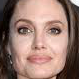

In [47]:
my_image = return_face_with_bounding_box('test.jpg')
my_image[0]

Capture frames from video

In [1]:
import cv2, os
os.makedirs("data/sanyam",exist_ok=True)
os.makedirs("temp",exist_ok=True)
os.makedirs("data1/sanyam",exist_ok=True)
count = 0

def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    global count
    success = 1
  
    while success: 
        success, image = vidObj.read()

        try:
          # cv2.imwrite("data/sanyam/frame%d.jpg" % count, image)

          cv2.imwrite("temp/frame%d.jpg" % count, image)
          img = return_face_with_bounding_box("temp/frame%d.jpg" % count)
          try:
            img[0].save("data1/sanyam/frame%d.jpg" % count)
          except:
            print("can't detect face")
        except:
          return
        count += 1

In [2]:
path = ['/content/drive/My Drive/VID_20200826_115733.mp4', '/content/drive/My Drive/VID_20200826_115817.mp4']

for i in path:
  FrameCapture(i)

# Without Region of interest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import cv2, os
os.makedirs("data/sanyam",exist_ok=True)

count = 0
def FrameCapture(path): 
    vidObj = cv2.VideoCapture(path) 
    global count
    success = 1
  
    while success: 
        success, image = vidObj.read() 
        try:
          cv2.imwrite("data/sanyam/frame%d.jpg" % count, image) 
        except:
          return
        count += 1

In [5]:
path = ['/content/drive/My Drive/VID_20200826_115733.mp4', '/content/drive/My Drive/VID_20200826_115817.mp4', '/content/drive/My Drive/VID_20200827_210507.mp4']

for i in path:
  FrameCapture(i)

# Random Faces Data

In [6]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [7]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [8]:
!kaggle datasets download -d sanyam1992000/anime-faces-vs-human-faces

100% 3.79G/3.81G [01:00<00:00, 64.9MB/s]
100% 3.81G/3.81G [01:00<00:00, 67.3MB/s]


In [9]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Data/anime/1908_2001.jpg  
  inflating: Data/anime/1909_2001.jpg  
  inflating: Data/anime/190_2000.jpg  
  inflating: Data/anime/1910_2001.jpg  
  inflating: Data/anime/1911_2001.jpg  
  inflating: Data/anime/1912_2001.jpg  
  inflating: Data/anime/1913_2001.jpg  
  inflating: Data/anime/1914_2001.jpg  
  inflating: Data/anime/1915_2001.jpg  
  inflating: Data/anime/1916_2001.jpg  
  inflating: Data/anime/1917_2001.jpg  
  inflating: Data/anime/1918_2001.jpg  
  inflating: Data/anime/1919_2001.jpg  
  inflating: Data/anime/191_2000.jpg  
  inflating: Data/anime/1920_2001.jpg  
  inflating: Data/anime/1921_2001.jpg  
  inflating: Data/anime/1922_2001.jpg  
  inflating: Data/anime/1923_2001.jpg  
  inflating: Data/anime/1924_2001.jpg  
  inflating: Data/anime/1925_2001.jpg  
  inflating: Data/anime/1926_2001.jpg  
  inflating: Data/anime/1927_2001.jpg  
  inflating: Data/anime/1928_2001.jpg  
  inflating: Data/anime/1929_20

In [10]:
!mv /content/Data/human/ /content/data/

# ***Uploading Data To your Kaggle Account***

***Lets Install Kaggle First***

In [11]:
!pip install kaggle

***Add your Kaggle API***

This directly uploads API to */content*

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


***Installing Pandas, OS and Setting Environment Variables for Kaggle***

In [ ]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

***To Generate Metadata.json file to folder containing Dataset***

Points to Remember



*   Your Dataset should be in .zip format ie avoid Data in Folder
*   Metadata.json file would be edited after downloading



In [12]:
!kaggle datasets init -p '/content/data'

Data package template written to: /content/data/dataset-metadata.json


***Uploading Data***



*   Change your Metadata.json
*   Run below code to upload



In [14]:
!kaggle datasets create --dir-mode "tar" -p '/content/data'

Starting upload for file sanyam.tar
100% 420M/420M [00:13<00:00, 33.8MB/s]
Upload successful: sanyam.tar (420MB)
Starting upload for file human.tar
100% 3.80G/3.80G [01:45<00:00, 38.6MB/s]
Upload successful: human.tar (4GB)
Your private Dataset is being created. Please check progress at https://www.kaggle.com/sanyam1992000/self-face-recognition1
